# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/T5/Week 2/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


# **Find the dataset information and observe the datatypes.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

i will focus on these feautures :

after analyzing it show almost all data are object

Time: Time when the accident occurred.

Day_of_week: Day of the week.

Age_band_of_driver: Age group of the driver involved.< consedring to change the typ?


Sex_of_driver: Gender of the driver.

Educational_level: Educational level of the driver
.
Type_of_vehicle: Type of vehicle involved in the accident.

Cause_of_accident: Reported cause of the accident.

Accident_severity: Severity of the accident.

Target Column: Accident_severity is used as the target column for modeling. This feature classifies the severity of each accident.

In [ ]:
df_cl = df[['Time', 'Day_of_week','Age_band_of_driver','Sex_of_driver','Educational_level','Type_of_vehicle','Cause_of_accident','Accident_severity','Number_of_vehicles_involved','Number_of_casualties']]

# **View the the data with various functions to get an initial sense of the data.**

In [ ]:
df_cl.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity,Number_of_vehicles_involved,Number_of_casualties
0,17:02:00,Monday,18-30,Male,Above high school,Automobile,Moving Backward,Slight Injury,2,2
1,17:02:00,Monday,31-50,Male,Junior high school,Public (> 45 seats),Overtaking,Slight Injury,2,2
2,17:02:00,Monday,18-30,Male,Junior high school,Lorry (41?100Q),Changing lane to the left,Serious Injury,2,2
3,1:06:00,Sunday,18-30,Male,Junior high school,Public (> 45 seats),Changing lane to the right,Slight Injury,2,2
4,1:06:00,Sunday,18-30,Male,Junior high school,NaN,Overtaking,Slight Injury,2,2


In [ ]:
df_cl.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity,Number_of_vehicles_involved,Number_of_casualties
12311,16:15:00,Wednesday,31-50,Male,NaN,Lorry (11?40Q),No distancing,Slight Injury,2,1
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Automobile,No distancing,Slight Injury,2,1
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Bajaj,Changing lane to the right,Serious Injury,1,1
12314,13:55:00,Sunday,18-30,Female,Junior high school,Lorry (41?100Q),Driving under the influence of drugs,Slight Injury,2,1
12315,13:55:00,Sunday,18-30,Male,Junior high school,Other,Changing lane to the right,Slight Injury,2,1


In [ ]:
df_cl.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity,Number_of_vehicles_involved,Number_of_casualties
1534,18:45:00,Friday,31-50,Male,Junior high school,Pick up upto 10Q,Moving Backward,Slight Injury,3,2


# **Check for null values.**

In [ ]:
df_cl.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Type_of_vehicle,950
Cause_of_accident,0
Accident_severity,0
Number_of_vehicles_involved,0
Number_of_casualties,0


# **Check for duplicated data.**

In [ ]:
df_cl.duplicated().sum()

57

In [ ]:
df_cl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12253 entries, 0 to 12315
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12253 non-null  object
 1   Day_of_week                  12253 non-null  object
 2   Age_band_of_driver           12253 non-null  object
 3   Sex_of_driver                12253 non-null  object
 4   Educational_level            12253 non-null  object
 5   Type_of_vehicle              12253 non-null  object
 6   Cause_of_accident            12253 non-null  object
 7   Accident_severity            12253 non-null  object
 8   Number_of_vehicles_involved  12253 non-null  int64 
 9   Number_of_casualties         12253 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 1.0+ MB


# **Perform summary statistics on the dataset to grasp central tendencies and variability.**

In [ ]:
df_cl.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12253.000000,12253.000000
mean,2.039582,1.545336
std,0.686717,1.003913
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


The number of vehicles involved in most accidents is relatively low, with the majority involving 2 or fewer vehicles.


The number of casualties per accident is also typically low, with most accidents resulting in 1 or 2 casualties.

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

# **hhandle missing values:**

In [ ]:
df_cl['Educational_level'].value_counts()

,count
Educational_level,
Junior high school,7619
Elementary school,2163
High school,1110
Above high school,362
Writing & reading,176
Unknown,100
Illiterate,45


In [ ]:
df_cl['Educational_level']=df['Educational_level'].fillna('Unknown',inplace=True)

In [ ]:
df_cl['Type_of_vehicle'].value_counts()

,count
Type_of_vehicle,
Automobile,3205
Lorry (41?100Q),2186
Other,1208
Pick up upto 10Q,811
Public (12 seats),711
Stationwagen,687
Lorry (11?40Q),541
Public (13?45 seats),532
Public (> 45 seats),404


In [ ]:
df_cl['Type_of_vehicle']=df['Type_of_vehicle'].fillna('Other',inplace=True)

In [ ]:
df_cl.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Type_of_vehicle,0
Cause_of_accident,0
Accident_severity,0
Number_of_vehicles_involved,0
Number_of_casualties,0


# **handle duplications:**

In [ ]:
df_cl.drop_duplicates(inplace=True)

In [ ]:
df_cl.duplicated().sum()

0

# **scaling:**

In [ ]:
scaler = StandardScaler()
df_cl[['Number_of_vehicles_involved', 'Number_of_casualties']] = scaler.fit_transform(df_cl[['Number_of_vehicles_involved', 'Number_of_casualties']])

In [ ]:
sample = df_cl[['Number_of_vehicles_involved', 'Number_of_casualties']].sample()
print(sample)

      Number_of_vehicles_involved  Number_of_casualties
5111                    -0.057642             -0.543233


## **label encoding:**

In [ ]:
label_encoder = LabelEncoder()
df['Accident_severity'] = label_encoder.fit_transform(df['Accident_severity'])

In [ ]:
df['Accident_severity'].sample(5)

,Accident_severity
4034,2
1369,2
1250,2
9920,2
8878,2


# **# One-Hot Encoding**

In [ ]:
df_cl['Sex_of_driver'].value_counts()

,count
Sex_of_driver,
Male,11378
Female,697
Unknown,178


In [ ]:
mode_sex = df_cl['Sex_of_driver'].mode()[0]
df_cl['Sex_of_driver'] = df_cl['Sex_of_driver'].replace('Unknown', mode_sex)

In [ ]:
df_cl['Sex_of_driver'].value_counts()

,count
Sex_of_driver,
Male,11556
Female,697


In [ ]:
df_cl = pd.get_dummies(df_cl, columns=['Day_of_week', 'Sex_of_driver', 'Type_of_vehicle', 'Cause_of_accident'], drop_first=True)

# **Feature Engineering**

In [ ]:
df_cl['Hour'] = pd.to_datetime(df_cl['Time']).dt.hour
df_cl.drop(columns=['Time'], inplace=True)

In [ ]:
df_cl.head()

,Age_band_of_driver,Educational_level,Accident_severity,Number_of_vehicles_involved,Number_of_casualties,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,...,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown,Hour
0,18-30,Above high school,Slight Injury,-0.057642,0.452911,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,17
1,31-50,Junior high school,Slight Injury,-0.057642,0.452911,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,17
2,18-30,Junior high school,Serious Injury,-0.057642,0.452911,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,17
3,18-30,Junior high school,Slight Injury,-0.057642,0.452911,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
4,18-30,Junior high school,Slight Injury,-0.057642,0.452911,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,1


Text(0, 0.5, 'Time')

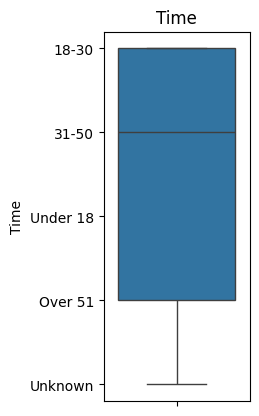

In [ ]:
#use boxplot to chech for outliers:
plt.subplot(1,3,1)
sns.boxplot(y='Age_band_of_driver',data=df_cl)
plt.title('Time')
plt.ylabel('Time')

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<ipython-input-235-9fbd3c5f69fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_matrix_df['Accident_severity'] = label_encoder.fit_transform(corr_matrix_df['Accident_severity'])


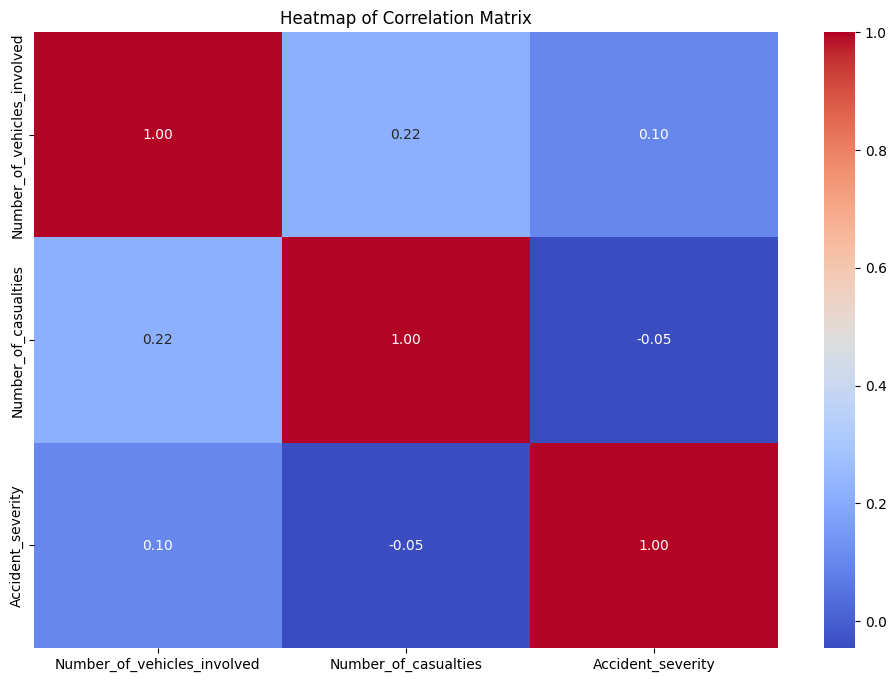

In [ ]:
corr_matrix_df = df_cl[['Number_of_vehicles_involved', 'Number_of_casualties', 'Accident_severity']]


label_encoder = LabelEncoder()
corr_matrix_df['Accident_severity'] = label_encoder.fit_transform(corr_matrix_df['Accident_severity'])

# Calculate the correlation matrix
corr_matrix = corr_matrix_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Correlation Matrix')
plt.show()

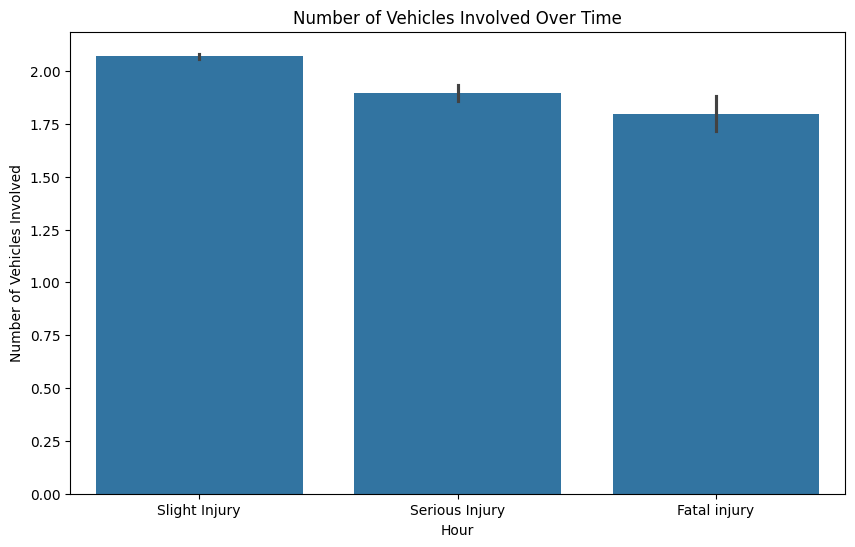

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Accident_severity', y='Number_of_vehicles_involved')
plt.title('Number of Vehicles Involved Over Time')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles Involved')
plt.show()

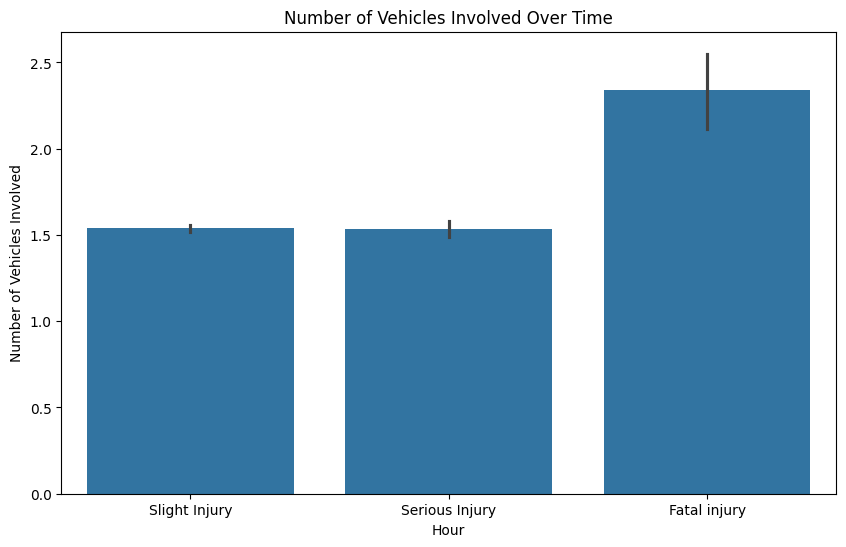

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Accident_severity', y='Number_of_casualties')
plt.title('Number of Vehicles Involved Over Time')
plt.xlabel('Hour')
plt.ylabel('Number of Vehicles Involved')
plt.show()

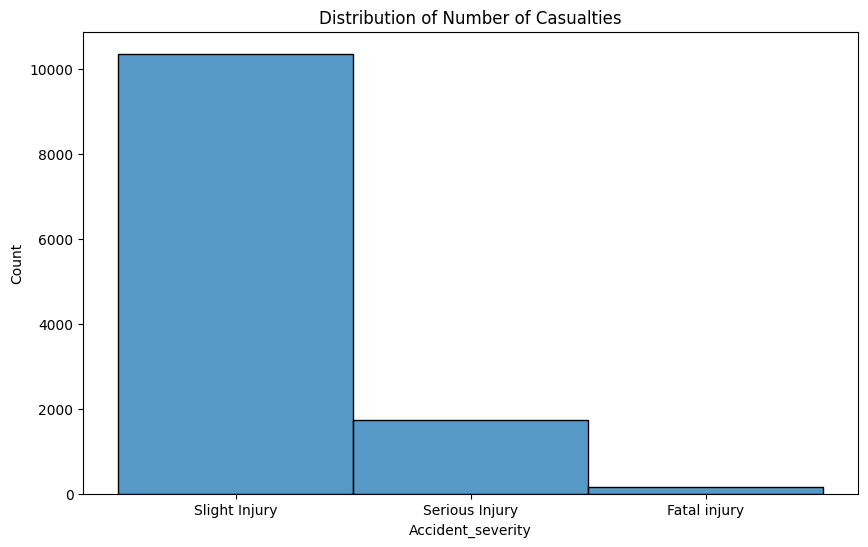

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cl['Accident_severity'], bins=10)
plt.title('Distribution of Number of Casualties')
plt.xlabel('Accident_severity')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [ ]:
numeric_cols = ['Number_of_vehicles_involved', 'Number_of_casualties']
X = df_cl[numeric_cols]
y = df_cl['Accident_severity']#Target

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train)

y_pred_log_reg = log_reg.predict(X_test)

#### Decision Tree Classifier

In [ ]:
dec_tree = DecisionTreeClassifier()

dec_tree.fit(X_train, y_train)

y_pred_dec_tree = dec_tree.predict(X_test)


#### Support Vector Machine (SVM)

In [ ]:
svm = SVC()

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

#### K-Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [ ]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression:
Accuracy: 0.8425132598939209
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        34
Serious Injury       0.00      0.00      0.00       352
 Slight Injury       0.84      1.00      0.91      2065

      accuracy                           0.84      2451
     macro avg       0.28      0.33      0.30      2451
  weighted avg       0.71      0.84      0.77      2451



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dec_tree))
print(classification_report(y_test, y_pred_dec_tree))

Decision Tree Classifier:
Accuracy: 0.8449612403100775
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        34
Serious Injury       0.75      0.03      0.05       352
 Slight Injury       0.85      1.00      0.92      2065

      accuracy                           0.84      2451
     macro avg       0.53      0.34      0.32      2451
  weighted avg       0.82      0.84      0.78      2451



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


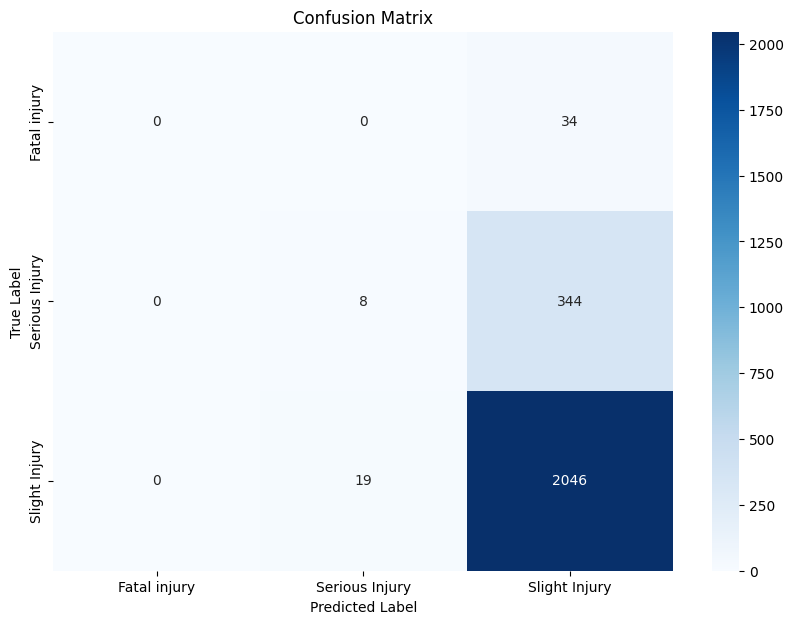

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=dec_tree.classes_, yticklabels=dec_tree.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("Support Vector Machine (SVM):")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM):
Accuracy: 0.8445532435740514
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        34
Serious Injury       1.00      0.01      0.03       352
 Slight Injury       0.84      1.00      0.92      2065

      accuracy                           0.84      2451
     macro avg       0.61      0.34      0.31      2451
  weighted avg       0.85      0.84      0.78      2451



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("K-Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

K-Neighbors Classifier:
Accuracy: 0.8380252957976336
                precision    recall  f1-score   support

  Fatal injury       0.00      0.00      0.00        34
Serious Injury       0.30      0.02      0.04       352
 Slight Injury       0.84      0.99      0.91      2065

      accuracy                           0.84      2451
     macro avg       0.38      0.34      0.32      2451
  weighted avg       0.75      0.84      0.77      2451



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:




The Decision Tree Classifier demonstrated the highest accuracy (0.8450) outperforming the rest of the models tested.


all models struggled with the minority classes ("Fatal injury" and "Serious Injury") indicating a challenge with class imbalance.


Future improvements could include resampling techniques to address class imbalance.